# Model Building and Training Notebook

## Objectives

* Answer Business requirement 2:
The client requires a machine learning model developed to accurately identify dog breeds from images.
* Implement callbacks for learning rate reduction and early stopping to enhance training efficiency.
* Use the Adam optimizer for training the model.
* Build a neural network model using dropout for regularization and a dense output layer for multi-class classification.


## Inputs

* n_breeds.pkl
* final_features.pkl
* y.pkl

## Outputs

* tailteller_model.keras
* Accuracy and Validation plot


---

In [2]:
import os
import pickle
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.models import save_model

2024-05-08 18:36:42.960315: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-08 18:36:42.960493: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 18:36:42.962258: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 18:36:42.984552: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 18:36:43.377979: W tensorflow/compiler/tf2tensorrt/utils/py_uti

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
current_dir = os.getcwd()
current_dir

'/home/jaaz/Desktop/project-5/TailTeller/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("New current directory:", os.getcwd())

New current directory: /home/jaaz/Desktop/project-5/TailTeller


---

# Creating callbacks

Callbacks are helper functions that a machine learning model can use during training to save model progress or stop training if nothing significant is happening.

In [5]:
# Set up Learning Rate Annealer
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc', 
    factor=0.01, 
    patience=3, 
    min_lr=1e-5,
    verbose=1
)

# Prepare Callbacks for Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

### Stablish hyperparameters.

### Initialize an optimization algorithm used in training neural networks called Adam.

In [6]:
# Hyperparameters
batch_size = 128
epochs = 50
learning_rate = 0.001

# Initialize Adaptive Moment Estimation (Adam) optimizer
adam_optimizer = Adam(
    learning_rate=learning_rate, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=None, 
    amsgrad=False
)

# Model Building and Training

We have now the following:
- Callbacks
    * learning_rate_reduction
    * early_stopping
- Hyperparameteers:
    * batch_size
    * epochs
    * learning_rate
- Algorithm Optimizer:
    * adam_optimizer

We are now ready to build and train the model.

One important thing to notice: the 0.7 number is important in the following code.
It's a parameter of "Dropout" layer in a neural network model. It specifies the dropout rate at which nodes (neurons) are randomly dropped during training.

* 0.7 -> There is a 70% chance that the output of each neuron in the previous layer is set to zero during training.
Meaning that only 30% of nodes contribute to the activation and backpropagation processes at each step.

* Overfitting reduction: By dropping 70% of the neurons randomly, the network becomes less sensitive to the specific weights of neurons, this will reduce the risk of overfitting in the training data.

* Model robustness: With such a high dropout rate, the remaining neurons take on the "burden" of adjusting to represent the missing neurons, potentially leading to a more robust representation of the data.

In [7]:
with open('final_features.pkl', 'rb') as f:
    final_features = pickle.load(f)

with open('n_breeds.pkl', 'rb') as f:
    n_breeds = pickle.load(f)

with open('y.pkl', 'rb') as f:
    y = pickle.load(f)

# Initialize a Sequential Deep Learning model
model = Sequential()

# Add a Dropout layer to prevent overfitting with 70% dropout rate
model.add(Dropout(0.7, input_shape=(final_features.shape[1],)))

# Add a Dense output layer with softmax activation for multi-class classification
model.add(Dense(n_breeds, activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss
adam_optimizer = Adam()

model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with the feature data

history = model.fit(
    final_features, y,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[learning_rate_reduction, early_stopping]
)


Epoch 1/50


/home/jaaz/.conda/envs/py10/lib/python3.10/site-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4275 - loss: 3.0353 - val_accuracy: 0.9189 - val_loss: 0.2649 - learning_rate: 0.0010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9373 - loss: 0.2088 - val_accuracy: 0.9238 - val_loss: 0.2354 - learning_rate: 0.0010
Epoch 3/50
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9297 - loss: 0.2380

/home/jaaz/.conda/envs/py10/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9555 - loss: 0.1524 - val_accuracy: 0.9257 - val_loss: 0.2316 - learning_rate: 0.0010
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9652 - loss: 0.1168 - val_accuracy: 0.9296 - val_loss: 0.2308 - learning_rate: 0.0010
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9721 - loss: 0.0900 - val_accuracy: 0.9189 - val_loss: 0.2323 - learning_rate: 0.0010
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.0774 - val_accuracy: 0.9247 - val_loss: 0.2342 - learning_rate: 0.0010
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.0693 - val_accuracy: 0.9257 - val_loss: 0.2455 - learning_rate: 0.0010
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0564 - val_accuracy: 0.9267 - val_loss: 0.2347 - learning_rate: 0.0010
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.0440 - val_accuracy: 0.9208 - va

In [7]:
# Save the trained model
save_model(model, 'src/machine_learning/tailteller_model.keras')

# Conclusions and Next steps

The model building and training was successfully performed.

The model underwent significant training phases, demonstrating high accuracy, which suggests effective learning and generalization capabilities.

## Next steps:

- Model Testing

    * Validation Testing: Perform additional testing using the test/ folder with dog images for cross-validation.
    * Performance Metrics: Assess detailed performance metrics such as precision recall, F1-score and confusion matrix to identify any bias.

---

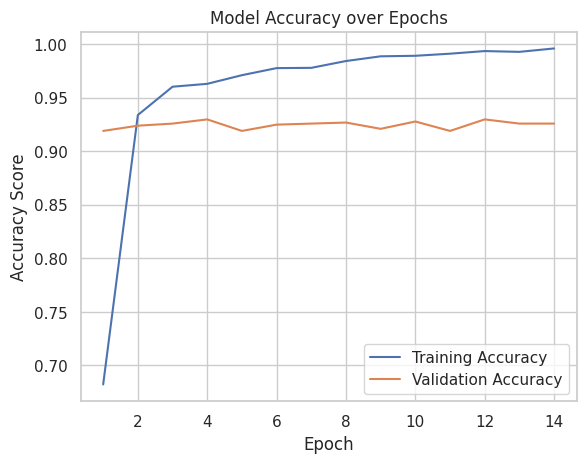

Final training accuracy: 1.00
Final validation accuracy: 0.93


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Get training and validation accuracy histories
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot training accuracy
sns.lineplot(x=epoch_count, y=training_accuracy, ax=ax, label='Training Accuracy')

# Plot validation accuracy
sns.lineplot(x=epoch_count, y=validation_accuracy, ax=ax, label='Validation Accuracy')

# Set labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy over Epochs')

# Show the plot
plt.show()

# Print the final training accuracy
print(f'Final training accuracy: {format(training_accuracy[-1], ".2f")}')

# Print the final validation accuracy
print(f'Final validation accuracy: {format(validation_accuracy[-1], ".2f")}')